<a href="https://colab.research.google.com/github/m4vic/neuralnets/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

flow of this  
data loader obj training and test data --> training loop ---> evaluation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
#set random seeds for reproducibility
torch.manual_seed(42)

In [ ]:
df = pd.read_csv('/content/fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


SEE THE DATA

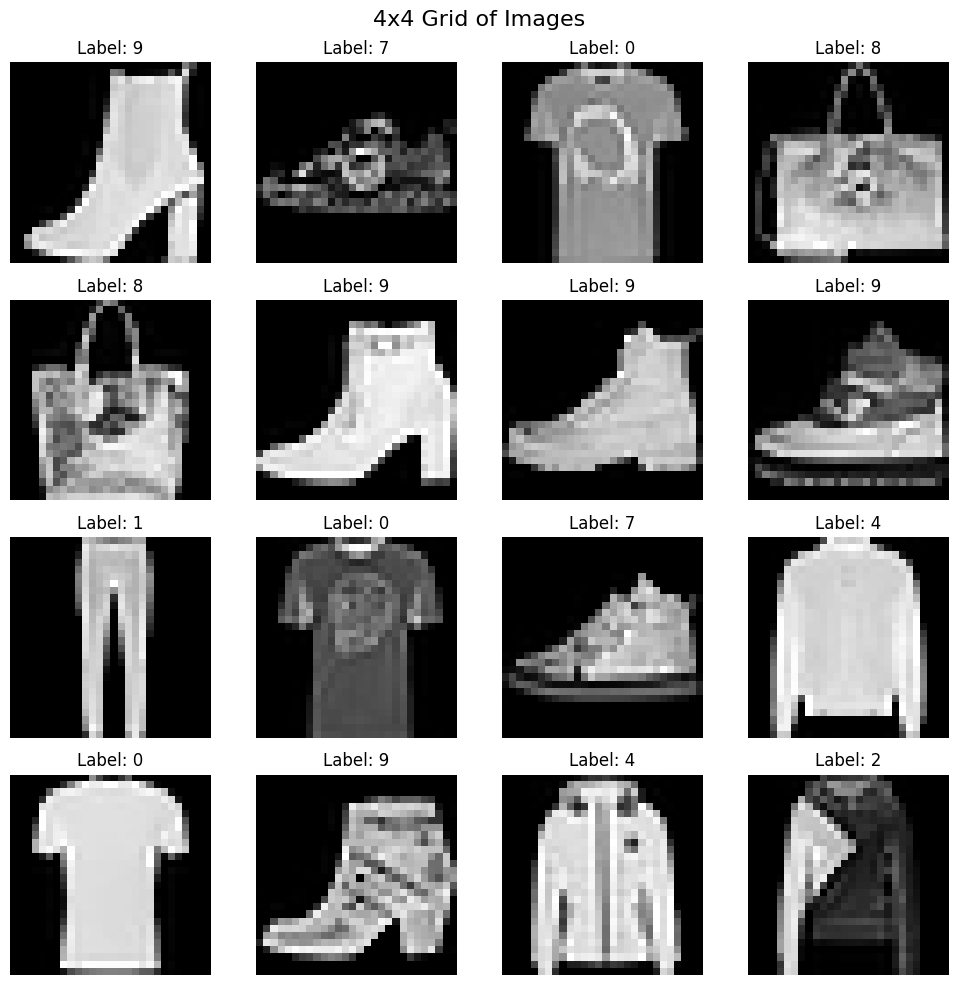

In [ ]:
# create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle('4x4 Grid of Images', fontsize=16)

for i , ax in enumerate(axes.flat):
  ax.imshow(df.iloc[i, 1:].values.reshape(28, 28), cmap='grey')
  ax.set_title(f'Label: {df.iloc[i, 0]}')
  ax.axis('off')

plt.tight_layout()
plt.show()

DATA

In [ ]:
X = df.iloc[:, 1:].values # all from 1 index to end
y = df.iloc[:, 0].values # all 0 th index ie label

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# SCALING THE FEATURES coz noramalize
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# create CustomDataset Class

class CustomDataset(Dataset):

  def __init__(self, features, labels): # it will fetch the data from dataset
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long) # declaring the data

  def __len__(self): # it will retrun len
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]


In [ ]:
# create train_dataset object
train_dataset = CustomDataset(x_train, y_train)

In [ ]:
len(train_dataset)

4800

In [ ]:
#create test_dataset object
test_dataset = CustomDataset(x_test, y_test)

In [ ]:
#create train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# define NN

class MyNN(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128), # input num_features and 128 features as output
        nn.ReLU(),
        nn.Linear(128, 64), # 128 input 64 output
        nn.ReLU(),
        nn.Linear(64, 10) #64 input 10 output
    )

  def forward(self, x):
    return self.model(x)


In [ ]:
# set learning rates
epochs = 200
learning_rate = 0.1

In [ ]:
len(train_loader)

150

In [ ]:
#instatiate the model
model = MyNN(x_train.shape[1])

#loss function
criterion = nn.CrossEntropyLoss()

#optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
#training loop

for epoch in range(epochs):
  total_epoch_loss = 0
  for batch_features, batch_labels in train_loader:

    #forward pass

    outputs = model(batch_features)

    #calculate loss
    loss = criterion(outputs, batch_labels)

    #backward pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    # accumulate loss
    total_epoch_loss = total_epoch_loss +  loss.item()
  avg_loss = total_epoch_loss / len(train_loader)
  print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss}')

Epoch [1/200], Loss: 1.0080584541956583
Epoch [2/200], Loss: 1.0377018042405446
Epoch [3/200], Loss: 1.0680195780595143
Epoch [4/200], Loss: 1.079578502178192
Epoch [5/200], Loss: 1.055448638598124
Epoch [6/200], Loss: 1.0313607188065848
Epoch [7/200], Loss: 1.0800978318850198
Epoch [8/200], Loss: 1.0333527986208597
Epoch [9/200], Loss: 1.0270263687769572
Epoch [10/200], Loss: 1.0307991723219554
Epoch [11/200], Loss: 1.050708500146866
Epoch [12/200], Loss: 1.019157325029373
Epoch [13/200], Loss: 1.0236454439163207
Epoch [14/200], Loss: 0.9990470131238302
Epoch [15/200], Loss: 1.015481917063395
Epoch [16/200], Loss: 1.0088760542869568
Epoch [17/200], Loss: 0.9893146844704946
Epoch [18/200], Loss: 1.1224540249506632
Epoch [19/200], Loss: 1.0063403367996215
Epoch [20/200], Loss: 1.0376440298557281
Epoch [21/200], Loss: 1.0579821960131328
Epoch [22/200], Loss: 1.0542615322271982
Epoch [23/200], Loss: 0.9929274479548137
Epoch [24/200], Loss: 1.0466636230548223
Epoch [25/200], Loss: 1.059715

In [ ]:
# set model to eval

model.eval() # tell the model that we are going to eval

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    outputs = model(batch_features)

    _, predicted = torch.max(outputs.data, 1) # give max from the predited value

    total = total + batch_labels.shape[0] #
    correct += (predicted == batch_labels).sum().item() # corrected if pred == batch

accuracy = correct / total

print(f'Accuracy: {accuracy}')

Accuracy: 0.6975


In [ ]:
len(test_loader)

38